# Kansrekenen

(target-probability-theory)=
Kansrekenen, waarschijnlijkheidsleer of **probabiliteitstheorie** is een wiskundig raamwerk om uitspraken te doen over onzekerheid. Het laat ons toe om onzekerheid te kwantificeren en biedt axioma's om nieuwe onzekere uitspraken af te leiden uit bestaande.

:::{note}
Kans $=$ Waarschijnlijkheid $=$ Probabiliteit
:::

Bij AI toepassingen gebruiken we kansrekenen op twee manieren:
1. Aangezien de wetten van kansrekenen bepalen hoe AI systemen moeten _redeneren over onzekerheid_, kunnen we bij het ontwerp van modellen handig gebruik maken van verschillende expressies uit de probabiliteitstheorie.
(target-statistical-analysis)=
2. We kunnen probabiliteit gebruiken om het gedrag van voorgestelde AI-systemen theoretisch te _analyseren_. Dit valt onder het domein van **statistische analyse**. Hierbij willen we de probabilistische eigenschappen van een systeem in kaart brengen.

:::{note}
Dit hoofdstuk is gebaseerd op hoofdstuk 3 [Goodfellow et al. (2016)](https://www.deeplearningbook.org/)
:::

## Waarom kansrekenen?

(target-deterministic)=
Veel domeinen binnen de computerwetenschappen werken voornamelijk met entiteiten die volledig **deterministisch** zijn of vooraf bepaald. Een programmeur kan er meestal van uitgaan dat een CPU iedere machine-instructie foutloos uitvoert. Er kunnen hardwarefouten optreden, maar die zijn zeldzaam genoeg zodat een programmeur er niet inherent rekening mee hoeft te houden.

(target-stochastic)=
In machine learning daarentegen moeten we altijd rekening houden met het tegengestelde van determinatie: **stochasticiteit** (of _randomness_). Er zijn drie mogelijke bronnen:

1. **Inherente stochasticiteit**  
Het systeem dat gemodelleerd wordt kan intrinsiek willekeurig zijn. Bijvoorbeeld, een kaartspel waarbij de kaarten in een random volgorde zitten.  
  
2. **Onvolledige observeerbaarheid**  
Zelfs deterministische systemen kunnen stochastisch lijken wanneer we niet alle variabelen kunnen observeren die het gedrag van het systeem bepalen. Een klassiek voorbeeld is het _Monty Hall probleem_: een kandidaat moet kiezen tussen drie deuren en wint een prijs achter de gekozen deur. Twee deuren leiden naar een geit, de derde naar een auto[^monty]. De uitkomst, gegeven de keuze van de kandidaat, is deterministisch, maar vanuit het perspectief van de kandidaat is de uitkomst onzeker.  

3. **Onvolledige modellering**  
Wanneer we een model gebruiken dat sommige geobserveerde informatie moet negeren, resulteert de weggelaten informatie in onzekere voorspellingen. Bijvoorbeeld, als een robot de locatie van alle objecten rond zich exact kan observeren maar de ruimte discretiseert bij het voorspellen van toekomstige locaties (in cellen opdeelt), dan zijn de voorspellingen automatisch onzeker binnen de dimensies van de cellen.

[^monty]: Het probleem gaat over een [probabilistische puzzel](https://en.wikipedia.org/wiki/Monty_Hall_problem) en werd omwille van het thema naar de presentator van de Amerikaanse tv show _Let's Make a Deal_ vernoemd. De puzzel luidt: _Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice_

:::{tip}
In veel gevallen is het **praktischer om een eenvoudige _onzekere_ regel te gebruiken** dan een complexe zekere regel, zelfs als de werkelijke regel deterministisch is. De regel "_De meeste vogels vliegen_" is gemakkelijk te implementeren en algemeen bruikbaar. Een regel in de vorm "_Vogels vliegen, behalve zeer jonge vogels die nog niet geleerd hebben te vliegen, zieke of gewonde vogels..._" is moeilijk om te implementeren, vatbaar voor uitzonderingen en leidt snel tot fouten.
:::

## Frequentistische vs. Bayesiaanse probabiliteit
(target-bayesian-probability)=
Kansrekenen was oorspronkelijk bedoeld om de frequentie van gebeurtenissen te analyseren, zoals bijvoorbeeld de kans om een bepaalde set kaarten te bekomen in een pokerspel. Deze soort van gebeurtenissen zijn meestal herhaalbaar. Als we hier zeggen dat een bepaalde gebeurtenis een kans $p=0.4$ heeft om voor te vallen, wil dat zeggen dat als we het experiment een oneindig aantal keer zouden herhalen, we die gebeurtenis in $40\%$ van de gevallen zullen tegenkomen.  
  
Dit soort redeneringen over probabiliteiten kunnen we echter niet toepassen bij uitkomsten die niet herhaalbaar zijn. Neem bijvoorbeeld de situatie waarbij een dokter zegt dat er een $40\%$ kans bestaat dat een patient griep heeft. Hier heeft $p=0.4$ geen betrekking op een frequentie (we kunnen de patiënt niet een oneindig aantal keren repliceren), maar op een mate van geloof (_degree of belief_).

Er bestaan dus twee benaderingen van probabiliteit:

1. **Frequentistische benadering**: Deze benadering beschouwt probabiliteit als de relatieve frequentie waarmee gebeurtenissen plaatsvinden.

2. **Bayesiaanse benadering**[^bayes]: Hier hebben probabiliteiten betrekking op de **mate van geloof** (_degree of belief_) in bepaalde hypotheses, waarbij $1$ absolute zekerheid aanduidt en $0$ absolute zekerheid dat iets niet het geval is. 

[^bayes]: De term [_Bayesiaans_](https://en.wikipedia.org/wiki/Bayesian_probability) is afgeleid van de 18e-eeuwse Engelse wiskundige en theoloog Thomas Bayes, die de eerste wiskundige behandeling gaf van een niet-triviaal probleem van statistische data-analyse met behulp van wat nu bekend staat als Bayesiaanse inferentie. Wiskundige Pierre-Simon Laplace was pionier van en populariseerde wat nu Bayesiaanse kansrekening wordt genoemd.

:::{note}
Ondanks het onderscheid in de interpretatie van probabiliteit, zijn de regels van kansrekenen in beide gevallen gelijk. Dit is een rechtstreeks gevolg als we uitgaan van een reeks algemeen wenselijke eigenschappen bij het redeneren over onzekerheden (zoals: _Als $A$ zekerder is dan $B$ en $B$ zekerder is dan $C$, dan moet $A$ zekerder zijn dan $C$_; {cite}`10.1112/plms/s2-25.1.338`)
:::

## Random variabelen

(target-random-variable)=
Een **random, kans- of stochastische variabele** is een variabele die willekeurig verschillende waarden kan aannemen. We duiden de random variabele aan met een kleine letter in _plain text_ (bv. $\text{x}$), en de waarden die het kan aannemen met subscripts (bv. $x_1$ en $x_2$). In het geval van vectoren gebruiken we $\pmb{\text{x}}$ om de variabele aan te duiden en $\pmb{x}$ voor een bepaalde realisatie.

Random variabelen kunnen **discreet** of **continu** zijn:

- **Discrete random variabele**: Heeft een eindig of aftelbaar oneindig[^countable_inf] aantal waarden. Deze waarden hoeven niet noodzakelijk integers te zijn; ze kunnen ook {ref}`nominaal <target-nominal>` zijn.

- **Continue random variabele**: Geassocieerd met een reële waarde.

[^countable_inf]: Een aftelbaar oneindig aantal waarden verwijst naar een verzameling met oneindig veel elementen, die echter op een systematische manier genummerd of geteld kunnen worden. Een bekend voorbeeld hiervan is de verzameling van de natuurlijke getallen $(1,2,3,\dots)$ of de gehele getallen $(\dots ,-2,-1,0,1,2,\dots)$. Het belangrijkste kenmerk is dat er een één-op-één correspondentie bestaat tussen deze verzameling en de verzameling van natuurlijke getallen.

## Kansverdelingen

(target-probability-distribution)=
Een **kansverdeling** (_probability distribution_) beschrijft hoe waarschijnlijk een random variabele of set van random variabelen elk van zijn mogelijke waarden aanneemt. De manier waarop we kansverdelingen beschrijven verschilt naargelang de random variabele discreet of continu is.

### Discrete variabelen en _Probability Mass Functions_

(target-pmf)=
Een kansverdeling over discrete waarden wordt beschreven met een **_probability mass function_** (PMF). We duiden deze functies aan met een hoofdletter $P$. 

De PMF verbindt de verschillende waarden die een discrete random variabele kan aannemen met de kans dat de variabele die waarden aanneemt. De kans dat $\text{x}=x$ wordt genoteerd als $P(x)$, waarbij:
- Een kans van $1$ aanduidt dat $\text{x}=x$ zeker is
- Een kans van $0$ aanduidt dat $\text{x}=x$ onmogelijk is

#### Eigenschappen van een PMF
Een functie $P$ is een PMF voor random variabele $\text{x}$ als:

1. Het domein van $P$ de set is van alle mogelijke waarden van $\text{x}$
2. $\forall x \in \text{x}, 0 \leq P(x) \leq 1$
3. $\sum_{x \in \text{x}} P(x) = 1$

:::{important}
(target-prob-complement-rule)=
Uit (3) volgt de zogenaamde **complement regel** bij kansrekenen:

$$
P(\text{x} \neq x_i) &= 1 - P(\text{x} = x_i)
$$
:::

:::{note} 🌍
:icon: false
:class: simple
Een typisch voorbeeld van een discrete kansvariabele is de uitkomst van gooi met een dobbelsteen. Ongeacht het feit of we met een faire of onfaire dobbelsteen te maken hebben, zal de uitkomst met 100% zekerheid of wel $1$, $2$, $3$, $4$, $5$ of $6$ zijn: 

$$
P(x \isin (1, 2, 3, 4, 5, 6)) = 1
$$

Als we naar de kansen op het niveau van de individuele waarden kijken, speelt het al dan niet fair zijn van de dobbelsteen wel een rol.  
  
Als de dobbelsteen _fair_ is, zal iedere waarde een gelijke kans hebben om op te treden namelijk $P(x) = \frac{1}{6}$. Dat volgt uit de eigenschap dat de som van alle kansen $1$ moet zijn en dat we hier op zoek zijn naar een gelijke kans voor iedere waarde:

$$
\begin{align}
\sum_{x \in (1,2,3,4,5,6)} P(x) &= 1 \cr
P(\text{x}=1) + P(\text{x}=2) + P(\text{x}=3) + P(\text{x}=4) + P(\text{x}=5) + P(\text{x}=6) &= 1 \cr
6 P(\text{x}=1) &= 1 \cr
P(\text{x}=1) & = \frac{1}{6}
\end{align}
$$

We krijgen dus:

$$
P(\text{x}=1) = P(\text{x}=2) = P(\text{x}=3) = P(\text{x}=4) = P(\text{x}=5) = P(\text{x}=6) = \frac{1}{6}
$$

Als we bijvoorbeeld 60 keer de dobbelsteen gooien, verwachten we dat iedere waarde ongeveer $60 \times \frac{1}{6} = 10$ keer zal voorkomen. We spreken hier over een _uniforme_ PMF. Een dergelijke PMF over $k$ verschillende waarden geeft iedere waarde een gelijke kans:

$$
P(\text{x} = x_i) = \frac{1}{k}
$$
  
Bij een _onfaire_ dobbelsteen, zullen de verschillende waarden een ongelijke kans hebben om op te treden. Stel dat we te maken hebben met een dobbelsteen waarbij de kans op $6$ twee keer zo groot is als de kans op eender welke andere waarde. Hoe ziet de PMF er dan uit? We kunnen dit eenvoudig uitrekenen aangezien we weten dat:
- de som van alle kansen $1$ moet zijn
- we voor alle uitkomsten die niet $6$ zijn een zelfde waarde zoeken
- de kans op $6$ dubbel zo groot is

$$
\begin{align}
\sum_{x \in (1,2,3,4,5,6)} P(x) &= 1 \cr
P(\text{x}=1) + P(\text{x}=2) + P(\text{x}=3) + P(\text{x}=4) + P(\text{x}=5) + P(\text{x}=6) &= 1 \cr
5 P(\text{x}=1) + 2 P(\text{x}=1) &= 1 \cr
P(\text{x}=1) (5 + 2) & = 1 \cr
P(\text{x}=1) & = \frac{1}{7}
\end{align}
$$

We krijgen dus:

$$
\begin{align}
P(\text{x}=1) = P(\text{x}=2) = P(\text{x}=3) = P(\text{x}=4) = P(\text{x}=5) &= \frac{1}{7} \cr
P(\text{x}=6) &= \frac{2}{7} 
\end{align}
$$


:::

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

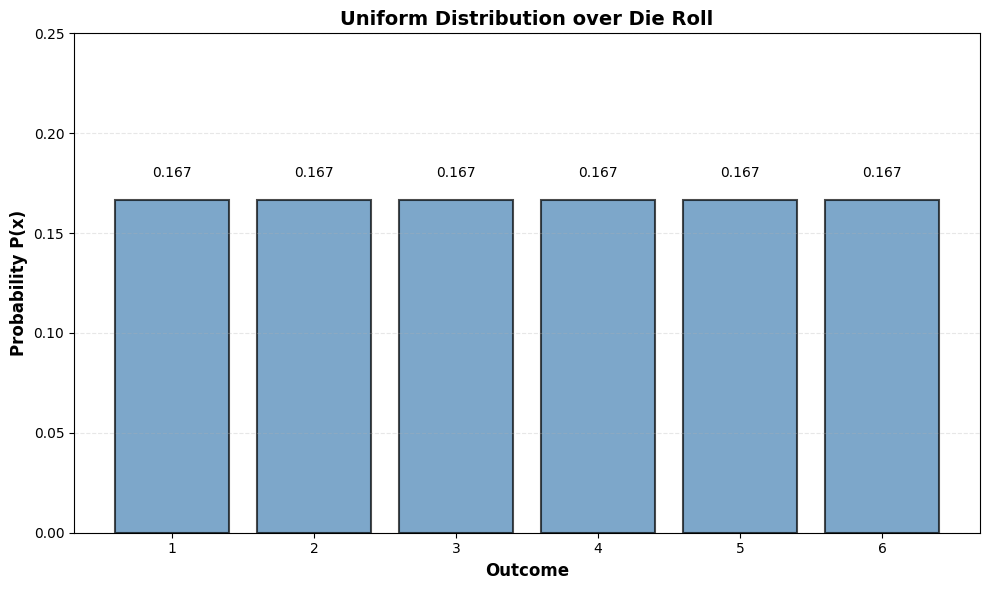

Sum of probabilities: 1.0 (must be 1.0)


In [ ]:
# Example: Discrete uniform distribution over a die roll
k = 6  # Six-sided die
outcomes = np.arange(1, k + 1)
probabilities = np.ones(k) / k

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(outcomes, probabilities, color="steelblue", alpha=0.7, edgecolor="black", linewidth=1.5)
ax.set_xlabel("Outcome", fontsize=12, fontweight="bold")
ax.set_ylabel("Probability P(x)", fontsize=12, fontweight="bold")
ax.set_title("Discrete Uniform Distribution over Die Roll", fontsize=14, fontweight="bold")
ax.set_xticks(outcomes)
ax.set_ylim(0, 0.25)
ax.grid(axis="y", alpha=0.3, linestyle="--")

# Add probability values on bars
for outcome, prob in zip(outcomes, probabilities, strict=False):
    ax.text(outcome, prob + 0.01, f"{prob:.3f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

print(f"Sum of probabilities: {probabilities.sum():.1f} (must be 1.0)")

Als we in het voorbeeld van een faire dobbelsteen de kans willen berekenen op een uitkomst oneven is _of_ $6$, volstaat het om de individuele kansen die daarmee overeenstemmen op te tellen:

$$
P(x=1) + P(x=3) + P(x=5) + P(x=6) = \frac{4}{6} = \frac{2}{3}
$$

Dit kunnen we enkel doen omdat we hier te maken hebben met de kans op niet overlappende uitkomsten. Stel dat we de kans op een oneven waarde _of_ $5$  willen berekenen, dan moeten we er rekening mee houden dat $5$ in beide sets aanwezig is en dus maar één keer geteld mag worden.  

:::{important}
(target-prob-sum-rule)=
De algemene **som regel** bij kansrekenen stelt:

$$
P(x \isin A \cup B) = P(x \isin A) + P(x \isin B) - P(x \isin A \cap B)
$$
:::

### Continue variabelen en _Probability Density Functions_

(target-pdf)=
Voor continue random variabelen gebruiken we een **_probability density function_** (PDF) in plaats van een _probability mass function_. We duiden deze functies aan met een kleine letter $p$.

#### Eigenschappen van een PDF:
Een functie $p$ is een PDF voor random variabele $\text{x}$ als:

1. Het domein van $p$ de set is van alle mogelijke toestanden van $\text{x}$
2. $\forall x \in \text{x}, p(x) \geq 0$. Merk op dat we niet eisen dat $p(x) \leq 1$
3. $\int p(x)dx = 1$

Een PDF $p(x)$ geeft _niet_ rechtstreeks de probabiliteit van een specifieke waarde voor $\text{x}$ zoals een PMF. Bij een continue random variabele is de kans om een exacte waarde $x$ te observeren in feite altijd $0$. De PDF geeft in plaats daarvan de _kansdichtheid_ als output. We moeten de PDF _integreren_ (denk: sommeren) om de eigenlijke kans van een set punten binnen een bepaald interval te vinden. De kans dat $x$ in een interval $[a,b]$ ligt wordt gegeven door:

$$
P(x \in [a,b]) = \int_a^b p(x)dx
$$

Voor een uniforme distributie op interval $[a, b]$ met $b > a$ krijgen we:

$$
u(x; a, b) = \begin{cases}
\frac{1}{b-a} & \text{als } x \in [a,b] \\
0 & \text{anders}
\end{cases}
$$

We noteren dit als $\text{x} \sim U(a,b)$.

Het feit dat we niet met kansen, maar met kansdichtheden te maken hebben impliceert ook dat $p(x) > 1$ kan zijn. Neem bijvoorbeeld een uniforme distributie

$$
u(x; 0, 0.5) = \begin{cases}
2 & \text{als } x \in [0, 0.5] \\
0 & \text{anders}
\end{cases}
$$

Hier is dus $p(x) = 2$. De kans op een waarde binnen het interval $[0, 0.5]$ is echter $1$:

$$
\int_{0}^{0.5} 2 dx = 2 \times 0.5 = 1
$$

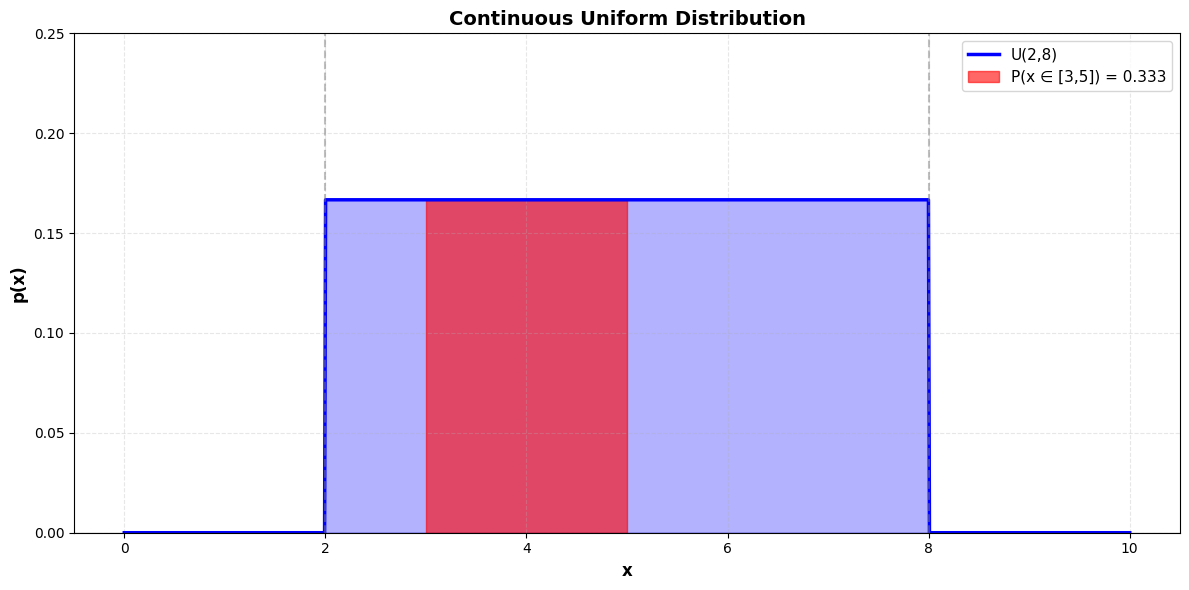

Height of PDF in [2,8]: 0.1667
Integral over entire domain: 1.0


In [3]:
# Example: Continuous uniform distribution
a, b = 2, 8
x = np.linspace(0, 10, 1000)
pdf = np.where((x >= a) & (x <= b), 1 / (b - a), 0)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, pdf, "b-", linewidth=2.5, label=f"U({a},{b})")
ax.fill_between(x, pdf, alpha=0.3, color="blue")

# Highlight probability of interval [3, 5]
x_interval = x[(x >= 3) & (x <= 5)]
pdf_interval = pdf[(x >= 3) & (x <= 5)]
ax.fill_between(
    x_interval,
    pdf_interval,
    alpha=0.6,
    color="red",
    label=f"P(x ∈ [3,5]) = {(5 - 3) / (b - a):.3f}",
)

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("p(x)", fontsize=12, fontweight="bold")
ax.set_title("Continuous Uniform Distribution", fontsize=14, fontweight="bold")
ax.set_ylim(0, 0.25)
ax.grid(alpha=0.3, linestyle="--")
ax.legend(fontsize=11)
ax.axhline(y=0, color="black", linewidth=0.8)
ax.axvline(x=a, color="gray", linestyle="--", alpha=0.5)
ax.axvline(x=b, color="gray", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

print(f"Height of PDF in [{a},{b}]: {1 / (b - a):.4f}")
print(f"Integral over entire domain: {(b - a) * (1 / (b - a)):.1f}")

### Theoretische en empirische kansverdelingen

In het algemene geval, weten we bij observaties van random variabelen, behalve de discrete of continue natuur, nooit vooraf met welke kansverdeling we precies te maken hebben. In sommige gevallen wordt zonder meer een assumptie gemaakt, bijvoorbeeld, de aanname dat we met een faire dobbelsteen te maken hebben en de PMF dus neerkomt op:
$$
\begin{aligned}
P(\text{x} = x_i) &= \frac{1}{k} \cr
&= \frac{1}{6}
\end{aligned}
$$
In het geval van continue random variabelen wordt vaak de assumptie gemaakt dat de PDF een Gauss- of normaalverdeling volgt met als algemene vorm:
$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$
Dit zijn beide voorbeelden van _theoretische_ distributies. We zullen later zien dat dergelijke volledig wiskundig beschreven verdelingen interessante implicaties hebben in de context van ML.  
> Als we over _theoretische_ kansverdelingen spreken, gaat het telkens over een _hypothese_ (de _populatieverdeling_ genoemd in de statistiek). In realiteit hebben we altijd te maken met steekproeven (_samples_) en steekproefverdelingen. Als we de assumptie maken dat de data een bepaalde theoretische verdeling volgt, betekent dat, dat we ervan uitgaan dat de steekproefverdeling die bepaalde populatieverdeling zal benaderen als we de steekproef oneindig groot maken.  
  
Wanneer we een steekproef nemen, kunnen we de geobserveerde kansen _binnen_ de steekproef weergeven. Bij een discrete random variabele kunnen we simpelweg voor iedere mogelijke uitkomst de frequentie binnen de steekproef berekenen en visualiseren met een staafdiagram. Bij continue random variabelen maken we meestal gebruikt van een histogram. We berekenen dan de frequenties binnen zelf gekozen intervallen (_bins_). In beide gevallen spreken we dan over de _empirische kansverdeling_. Het grote verschil met theoretische verdelingen is dat ze, buiten de algemene eigenschappen van PMFs en PDFs geen verdere wiskundige specificaties hebben. Ze worden dan ook meestal gebruikt om na te gaan met welke theoretische verdeling ze het best overeenkomen zodat met de specificaties van die verdeling verder gewerkt kan worden. 

:::{note} 🌍
:icon: false
:class: simple
Stel dat we te maken hebben met een populatie waarin de lichaamslengte (de continue random variabele $\text{x}$) een normaalverdeling volgt met gemiddelde $\mu=175$cm en standaardafwijking $\sigma=10$cm. Als we daaruit een steekproef nemen, kunnen we gebruik maken van een histogram om de _empirische_ kansverdeling te visualiseren.  
Als we de intervallen (_bins_) van ons histogram te klein maken, gegeven de steekproefgrootte, zullen we bins met een frequentie 0 tegenkomen. De correcte keuze van bin-locaties en breedtes kan een grote rol spelen in de evaluatie van de empirische verdeling (met het ook op een passende theoretische verdeling)
:::

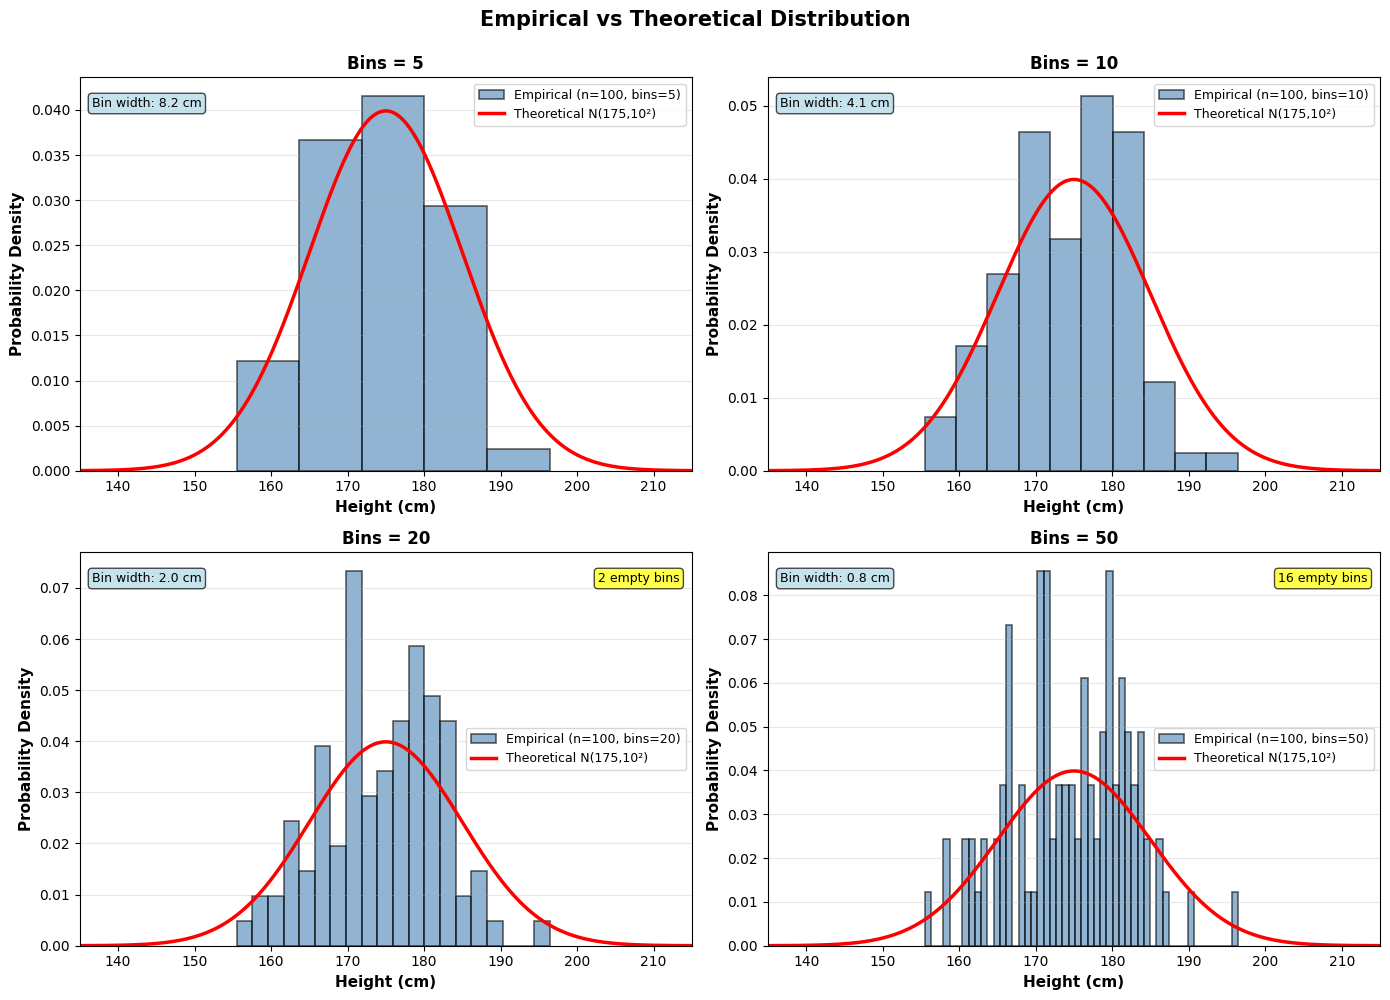

In [6]:
# Example: Theoretical vs Empirical Distribution
# Population parameters
mu = 175  # mean height in cm
sigma = 10  # standard deviation in cm

# Generate samples
rng = np.random.default_rng(42)
sample_size = 100
sample = rng.normal(mu, sigma, sample_size)

# Create figure with different bin sizes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Theoretical distribution curve
x_theory = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y_theory = stats.norm.pdf(x_theory, mu, sigma)

bin_sizes = [5, 10, 20, 50]
for ax, n_bins in zip(axes.flatten(), bin_sizes, strict=False):
    # Plot histogram (empirical distribution)
    counts, bins, patches = ax.hist(
        sample,
        bins=n_bins,
        density=True,
        alpha=0.6,
        color="steelblue",
        edgecolor="black",
        linewidth=1.2,
        label=f"Empirical (n={sample_size}, bins={n_bins})",
    )

    # Plot theoretical distribution
    ax.plot(x_theory, y_theory, "r-", linewidth=2.5, label=f"Theoretical N({mu},{sigma}²)")

    # Styling
    ax.set_xlabel("Height (cm)", fontsize=11, fontweight="bold")
    ax.set_ylabel("Probability Density", fontsize=11, fontweight="bold")
    ax.set_title(f"Bins = {n_bins}", fontsize=12, fontweight="bold")
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3, axis="y")
    ax.set_xlim(mu - 4 * sigma, mu + 4 * sigma)

    # Highlight empty bins if any
    empty_bins = np.sum(counts == 0)
    if empty_bins > 0:
        ax.text(
            0.98,
            0.95,
            f"{empty_bins} empty bins",
            transform=ax.transAxes,
            fontsize=9,
            bbox={"boxstyle": "round", "facecolor": "yellow", "alpha": 0.7},
            ha="right",
            va="top",
        )

    # Show bin width
    bin_width = bins[1] - bins[0]
    ax.text(
        0.02,
        0.95,
        f"Bin width: {bin_width:.1f} cm",
        transform=ax.transAxes,
        fontsize=9,
        bbox={"boxstyle": "round", "facecolor": "lightblue", "alpha": 0.7},
        ha="left",
        va="top",
    )

plt.suptitle("Empirical vs Theoretical Distribution", fontsize=15, fontweight="bold", y=0.995)
plt.tight_layout()
plt.show()

## Combinaties van kansvariabelen
Tot nu toe hebben we gekeken naar individuele kans variabelen. De regels van kansrekenen worden pas echt interessant als we naar combinaties van kansvariabelen kijken.

:::{note} 🌍
:icon: false
:class: simple
Stel dat we bij een spel niet één, maar twee faire dobbelstenen gooien. We hebben dan te maken met twee kansvariabelen $\text{x}$ en $\text{y}$. Wat is de kans dat beide dobbelstenen op $6$ uitkomen?

Bij twee faire dobbelstenen krijgen we $6 \times 6 = 36$ mogelijke uitkomsten. In de veronderstelling dat iedere combinatie een gelijke kans heeft, krijgen we:

| $\text{x} \backslash \text{y}$ | $y=1$ | $y=2$ | $y=3$ | $y=4$ | $y=5$ | $y=6$ |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| $x=1$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ |
| $x=2$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ |
| $x=3$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ |
| $x=4$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ |
| $x=5$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ |
| $x=6$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ | $\frac{1}{36}$ |

De kans dat beide dobbelstenen op $6$ uitkomen is dus $P(x=6, y=6) = \frac{1}{36} \approx 0.0278$ of ongeveer $2.78\%$.
:::

Het voorbeeld illustreert dat we bij twee of meerdere kansvariabelen de verdeling als een gezamenlijke (_joint_) distributie kunnen zien. Die distributie behoudt de eigenschappen van een enkelvoudige PMF of PDF.

:::{note} 🌍
:icon: false
:class: simple
Als we in het bovenstaande voorbeeld de kans willen berekenen op een uitkomst die samen $7$ geeft, volstaat het om de individuele kansen die daarmee overeenstemmen op te tellen (zie {ref}`som regel <target-prob-sum-rule>`):

$$
P(x=1, y=6) + P(x=2, y=5) + P(x=3, y=4) + P(x=4, y=3) + P(x=5, y=2) + P(x=6, y=1) = \frac{6}{36} = \frac{1}{6}
$$
:::

### Marginale kans

(target-marginal-probability)=
Soms kennen we de kansverdeling over een set van meerdere variabelen en willen we de verdeling over slechts een deelverzameling ervan kennen. De kansverdeling over de deelverzameling wordt de **marginale kansverdeling** genoemd.

Voor discrete random variabelen $\text{x}$ en $\text{y}$ en hun gezamenlijke verdeling $P(x, y)$ kunnen we de marginale verdeling $P(x)$ vinden met de {ref}`som regel <target-prob-sum-rule>`:

$$
\forall x \in \text{x}, P(x) = \sum_y P(x, y)
$$

Voor continue variabelen gebruiken we integratie in plaats van sommatie:

$$
p(x) = \int p(x, y)dy
$$

:::{note}
De naam "marginale kans" komt van het proces om marginale kansen op papier te berekenen. Wanneer de waarden van $P(x,y)$ in een grid worden geschreven met verschillende waarden van $x$ in rijen en verschillende waarden van $y$ in kolommen, is het natuurlijk om over een rij te sommeren en $P(x)$ in de marge van het papier rechts van de rij te schrijven.
:::



### Conditionele kans

(target-conditional-probability)=
In veel gevallen zijn we geïnteresseerd in de kans van een gebeurtenis, **gegeven dat** een andere gebeurtenis is gebeurd. Dit heet een **conditionele kans**.

We noteren de conditionele kans dat $\text{y}=y$ gegeven $\text{x}=x$ als $P(\text{y}=y|\text{x}=x)$. Deze wordt berekend met de formule:

$$
P(\text{y}=y|\text{x}=x) = \frac{P(\text{y}=y, \text{x}=x)}{P(\text{x}=x)}
$$

:::{warning}
Conditionele kans is alleen gedefinieerd wanneer $P(\text{x}=x) > 0$. We kunnen de kans niet berekenen geconditioneerd op een gebeurtenis die nooit gebeurt.
:::

:::{important}
(target-prob-prod-rule)=
Uit de definitie van de de conditionele kans volgt dat de gezamenlijke distributie van twee kansvariabelen ontleed kan worden in het product van de conditionele probabiliteit en de marginale probabiliteit:

$$
\begin{align}
P(x, y) &= P(y|x)P(x) \cr
&= P(x|y)P(y)
\end{align}
$$

Als we dit uitbreiden naar drie variabelen, krijgen we:

$$
\begin{align}
P(x,y,z) &= P(x|y,z)P(y,z) \\
&= P(x|y,z)P(y|z)P(z)
\end{align}
$$

Dit brengt ons bij de vaststelling dat elke gezamenlijke kansverdeling kan worden ontleed in conditionele distributies over slechts één variabele:

$$
P(x^{(1)}, \ldots, x^{(n)}) = P(x^{(1)})\prod_{i=2}^{n}P(x^{(i)}|x^{(1)}, \ldots, x^{(i-1)})
$$

Deze observatie staat bekend als de **product regel** bij kansrekenen.
:::

:::{note} 🌍
:icon: false
:class: simple
Hieronder illustreren we het principe van marginale en conditionele kansen in het geval van twee random variabelen die samen een zogenaamde bi-variate Gauss-verdeling vormen. 
:::

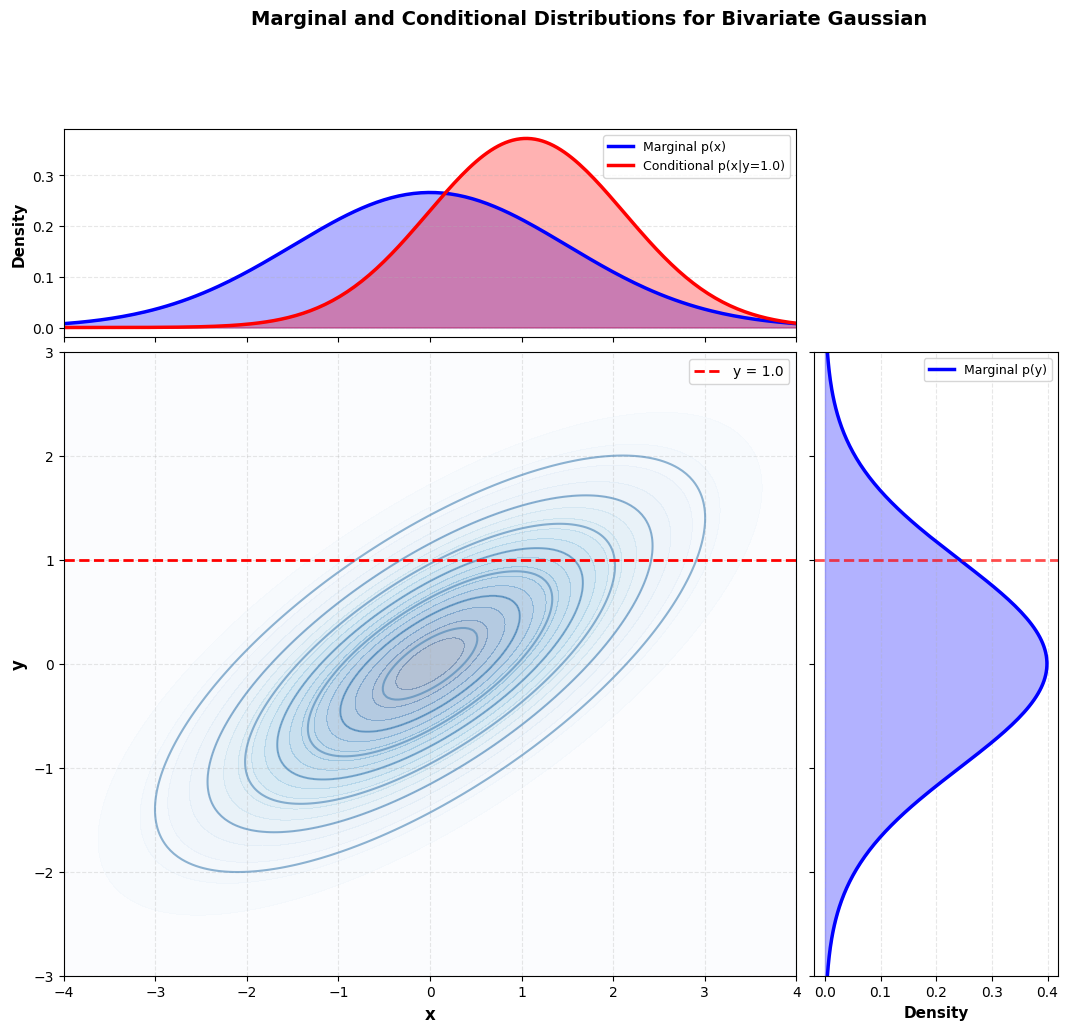

In [11]:
# Example: Marginal and Conditional Distributions with 2D Gaussian
# Create a 2D Gaussian distribution with correlation

# Parameters for bivariate normal distribution
mu_x, mu_y = 0, 0  # means
sigma_x, sigma_y = 1.5, 1.0  # standard deviations
rho = 0.7  # correlation coefficient

# Covariance matrix
cov_matrix = np.array(
    [[sigma_x**2, rho * sigma_x * sigma_y], [rho * sigma_x * sigma_y, sigma_y**2]]
)

# Create grid for evaluation
x = np.linspace(-4, 4, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Compute joint PDF
rv = stats.multivariate_normal([mu_x, mu_y], cov_matrix)
Z = rv.pdf(pos)

# Marginal distributions
pdf_x = stats.norm.pdf(x, mu_x, sigma_x)
pdf_y = stats.norm.pdf(y, mu_y, sigma_y)

# Conditional distribution: p(x|y=y0)
y0 = 1.0  # specific value of y
mu_x_given_y0 = mu_x + rho * (sigma_x / sigma_y) * (y0 - mu_y)
sigma_x_given_y0 = sigma_x * np.sqrt(1 - rho**2)
pdf_x_given_y0 = stats.norm.pdf(x, mu_x_given_y0, sigma_x_given_y0)

# Create figure with custom layout
fig = plt.figure(figsize=(14, 12))
gs = fig.add_gridspec(
    3, 3, height_ratios=[1, 3, 0.3], width_ratios=[3, 1, 0.3], hspace=0.05, wspace=0.05
)

# Main plot: joint distribution with contours
ax_joint = fig.add_subplot(gs[1, 0])
contour = ax_joint.contour(X, Y, Z, levels=8, colors="steelblue", linewidths=1.5, alpha=0.6)
contourf = ax_joint.contourf(X, Y, Z, levels=20, cmap="Blues", alpha=0.3)

# Add line indicating y=y0
ax_joint.axhline(y=y0, color="red", linestyle="--", linewidth=2, label=f"y = {y0}")

# Styling
ax_joint.set_xlabel("x", fontsize=12, fontweight="bold")
ax_joint.set_ylabel("y", fontsize=12, fontweight="bold")
ax_joint.set_xlim(-4, 4)
ax_joint.set_ylim(-3, 3)
ax_joint.grid(alpha=0.3, linestyle="--")
ax_joint.legend(fontsize=10, loc="upper right")

# Top plot: marginal p(x) and conditional p(x|y=y0)
ax_top = fig.add_subplot(gs[0, 0], sharex=ax_joint)
ax_top.plot(x, pdf_x, "b-", linewidth=2.5, label="Marginal p(x)")
ax_top.fill_between(x, pdf_x, alpha=0.3, color="blue")
ax_top.plot(x, pdf_x_given_y0, "r-", linewidth=2.5, label=f"Conditional p(x|y={y0})")
ax_top.fill_between(x, pdf_x_given_y0, alpha=0.3, color="red")
ax_top.set_ylabel("Density", fontsize=11, fontweight="bold")
ax_top.set_xlim(-4, 4)
ax_top.legend(fontsize=9, loc="upper right")
ax_top.grid(alpha=0.3, linestyle="--", axis="y")
ax_top.tick_params(labelbottom=False)

# Right plot: marginal p(y)
ax_right = fig.add_subplot(gs[1, 1], sharey=ax_joint)
ax_right.plot(pdf_y, y, "b-", linewidth=2.5, label="Marginal p(y)")
ax_right.fill_betweenx(y, pdf_y, alpha=0.3, color="blue")
ax_right.axhline(y=y0, color="red", linestyle="--", linewidth=2, alpha=0.7)
ax_right.set_xlabel("Density", fontsize=11, fontweight="bold")
ax_right.set_ylim(-3, 3)
ax_right.legend(fontsize=9, loc="upper right")
ax_right.grid(alpha=0.3, linestyle="--", axis="x")
ax_right.tick_params(labelleft=False)

plt.suptitle(
    "Marginal and Conditional Distributions for Bivariate Gaussian",
    fontsize=14,
    fontweight="bold",
    y=0.98,
)
plt.show()

### Onafhankelijkheid
(target-independence)=
Van zodra we met twee of meerdere random variabelen te maken krijgen, is het belangrijk om te weten of er al dan niet sprake is van afhankelijkheid tussen de waarden. Wanneer we de lichaamslengte en armlengte in een steekproef meten, zullen de uitkomsten van die kansvariabelen sterk positief gecorreleerd zijn. Als we daarentegen de uitkomst van twee gooien met een dobbelsteen tegen elkaar uitzetten, zal er geen sprake zijn van correlatie of afhankelijkheid: de uitkomst van de ene observatie hangt niet samen met de uitkomst van de andere.  
  
Wanneer twee **kansvariabelen onafhankelijk** zijn, geldt dat de conditionele verdeling gelijk is aan de marginale verdeling:  
  
Als

$$
x \perp y
$$

dan

$$
P(x|y) = P(x)
$$

Dit impliceert dat de gezamenlijke kansverdeling geschreven kan worden als het product van de marginale verdelingen:  
  
Als

$$
x \perp y
$$

dan

$$
\begin{align}
P(x, y) &= P(x|y)P(y)\cr
&=P(x)P(y)
\end{align}
$$

:::{note} 🌍
:icon: false
:class: simple
Hieronder illustreren we het principe van onafhankelijkheid in het geval van twee random variabelen die samen een bi-variate Gauss-verdeling vormen met correlatie $\rho=0$. In dit geval zijn de conditionele en marginale verdelingen identiek.
:::

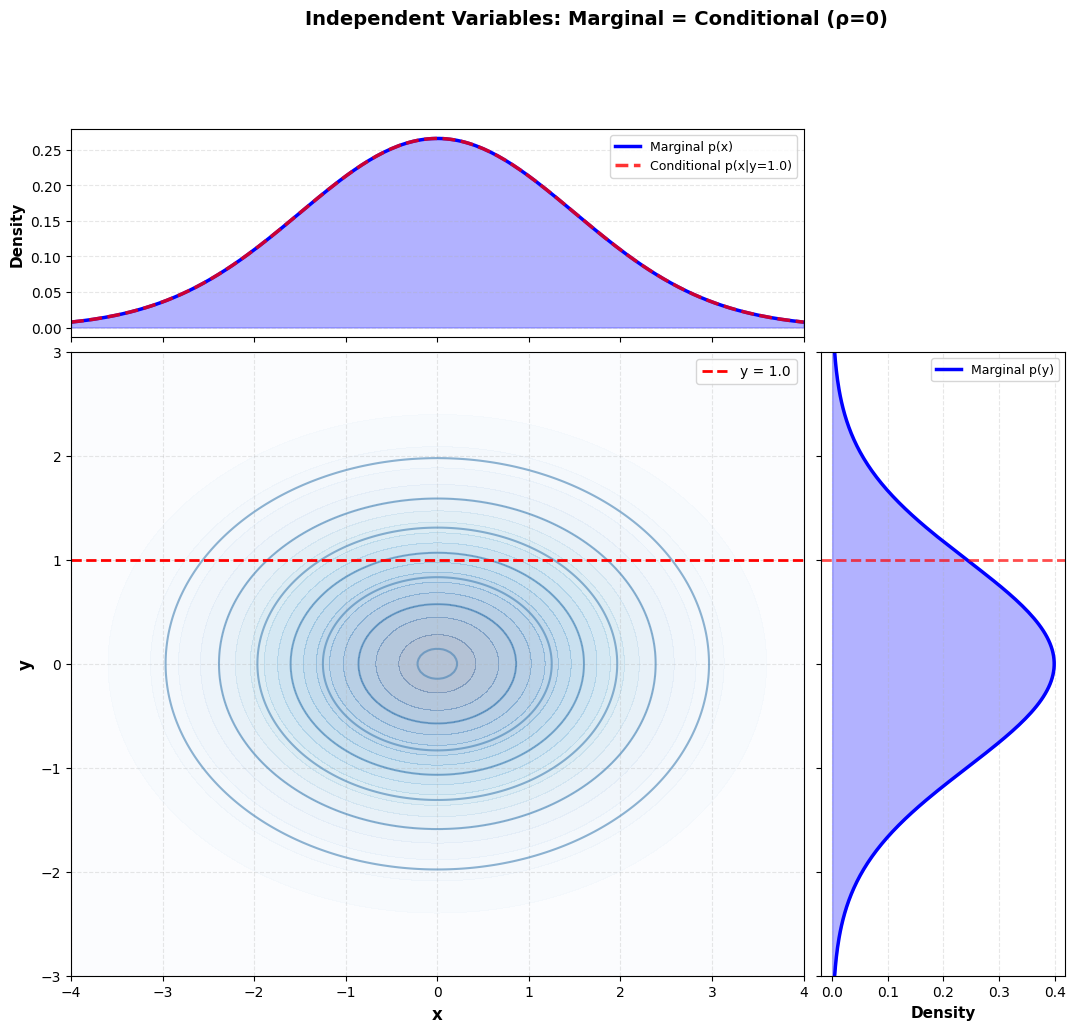

In [13]:
# Example: Independent Variables - Marginal equals Conditional
# Create a 2D Gaussian distribution with NO correlation (rho=0)

# Parameters for bivariate normal distribution with independence
mu_x, mu_y = 0, 0  # means
sigma_x, sigma_y = 1.5, 1.0  # standard deviations
rho = 0.0  # NO correlation - variables are independent

# Covariance matrix (diagonal for independent variables)
cov_matrix = np.array(
    [[sigma_x**2, rho * sigma_x * sigma_y], [rho * sigma_x * sigma_y, sigma_y**2]]
)

# Create grid for evaluation
x = np.linspace(-4, 4, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Compute joint PDF
rv = stats.multivariate_normal([mu_x, mu_y], cov_matrix)
Z = rv.pdf(pos)

# Marginal distributions
pdf_x = stats.norm.pdf(x, mu_x, sigma_x)
pdf_y = stats.norm.pdf(y, mu_y, sigma_y)

# Conditional distribution: p(x|y=y0)
y0 = 1.0  # specific value of y
# For independent variables: mu(x|y) = mu(x) and sigma(x|y) = sigma(x)
mu_x_given_y0 = mu_x + rho * (sigma_x / sigma_y) * (y0 - mu_y)  # = mu_x when rho=0
sigma_x_given_y0 = sigma_x * np.sqrt(1 - rho**2)  # = sigma_x when rho=0
pdf_x_given_y0 = stats.norm.pdf(x, mu_x_given_y0, sigma_x_given_y0)

# Create figure with custom layout
fig = plt.figure(figsize=(14, 12))
gs = fig.add_gridspec(
    3, 3, height_ratios=[1, 3, 0.3], width_ratios=[3, 1, 0.3], hspace=0.05, wspace=0.05
)

# Main plot: joint distribution with contours
ax_joint = fig.add_subplot(gs[1, 0])
contour = ax_joint.contour(X, Y, Z, levels=8, colors="steelblue", linewidths=1.5, alpha=0.6)
contourf = ax_joint.contourf(X, Y, Z, levels=20, cmap="Blues", alpha=0.3)

# Add line indicating y=y0
ax_joint.axhline(y=y0, color="red", linestyle="--", linewidth=2, label=f"y = {y0}")

# Styling
ax_joint.set_xlabel("x", fontsize=12, fontweight="bold")
ax_joint.set_ylabel("y", fontsize=12, fontweight="bold")
ax_joint.set_xlim(-4, 4)
ax_joint.set_ylim(-3, 3)
ax_joint.grid(alpha=0.3, linestyle="--")
ax_joint.legend(fontsize=10, loc="upper right")

# Top plot: marginal p(x) and conditional p(x|y=y0) - IDENTICAL for independent variables
ax_top = fig.add_subplot(gs[0, 0], sharex=ax_joint)
ax_top.plot(x, pdf_x, "b-", linewidth=2.5, label="Marginal p(x)")
ax_top.fill_between(x, pdf_x, alpha=0.3, color="blue")
# Plot conditional on top (will overlay perfectly since they're identical)
ax_top.plot(
    x,
    pdf_x_given_y0,
    "r--",
    linewidth=2.5,
    alpha=0.8,
    label=f"Conditional p(x|y={y0})",
)
ax_top.set_ylabel("Density", fontsize=11, fontweight="bold")
ax_top.set_xlim(-4, 4)
ax_top.legend(fontsize=9, loc="upper right")
ax_top.grid(alpha=0.3, linestyle="--", axis="y")
ax_top.tick_params(labelbottom=False)

# Right plot: marginal p(y)
ax_right = fig.add_subplot(gs[1, 1], sharey=ax_joint)
ax_right.plot(pdf_y, y, "b-", linewidth=2.5, label="Marginal p(y)")
ax_right.fill_betweenx(y, pdf_y, alpha=0.3, color="blue")
ax_right.axhline(y=y0, color="red", linestyle="--", linewidth=2, alpha=0.7)
ax_right.set_xlabel("Density", fontsize=11, fontweight="bold")
ax_right.set_ylim(-3, 3)
ax_right.legend(fontsize=9, loc="upper right")
ax_right.grid(alpha=0.3, linestyle="--", axis="x")
ax_right.tick_params(labelleft=False)

plt.suptitle(
    "Independent Variables: Marginal = Conditional (ρ=0)",
    fontsize=14,
    fontweight="bold",
    y=0.98,
)
plt.show()

## Verwachting, variantie en covariantie

### Verwachting

(target-expectation)=
De **verwachting** (_expectation_) of **verwachte waarde** (_expected value_) van een functie $f(x)$ met betrekking tot een kansdistributie $P(x)$ is de gemiddelde waarde die $f$ aanneemt wanneer $x$ wordt getrokken uit $P$.

Voor **discrete** variabelen:
$$
\mathbb{E}_{x \sim P}[f(x)] = \sum_x P(x)f(x)
$$

Voor **continue** variabelen:
$$
\mathbb{E}_{x \sim p}[f(x)] = \int p(x)f(x)dx
$$

:::{tip}
Wanneer de identiteit van de distributie duidelijk is uit de context, kunnen we simpelweg $\mathbb{E}_x[f(x)]$ of zelfs $\mathbb{E}[f(x)]$ schrijven.
:::

**Eigenschappen**:
- Verwachtingen zijn **lineair**:
$$
\mathbb{E}_x[\alpha f(x) + \beta g(x)] = \alpha \mathbb{E}_x[f(x)] + \beta \mathbb{E}_x[g(x)]
$$

### Variantie

(target-variance)=
De **variantie** geeft een maat voor hoeveel de waarden van een functie van een random variabele variëren wanneer we verschillende waarden van $x$ samplen uit de kansdistributie:

$$
\text{Var}(f(x)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2]
$$

Wanneer de variantie laag is, clusteren de waarden van $f(x)$ dicht bij hun verwachte waarde. De vierkantswortel van de variantie staat bekend als de **standaarddeviatie** (_standard deviation_).

### Covariantie

(target-covariance)=
De **covariantie** geeft een indicatie van hoeveel twee waarden lineair gerelateerd zijn aan elkaar, evenals de schaal van deze variabelen:

$$
\text{Cov}(f(x), g(y)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])(g(y) - \mathbb{E}[g(y)])]
$$

**Interpretatie**:
- Hoge absolute waarden van covariantie: de waarden veranderen veel en zijn beiden ver van hun respectievelijke gemiddeldes tegelijkertijd
- **Positief teken**: beide variabelen nemen gelijktijdig relatief hoge waarden aan
- **Negatief teken**: één variabele neemt een relatief hoge waarde aan wanneer de andere een relatief lage waarde aanneemt

:::{warning}
**Covariantie en afhankelijkheid zijn gerelateerd maar verschillende concepten**:
- Twee variabelen die onafhankelijk zijn hebben nul covariantie
- Twee variabelen met non-zero covariantie zijn afhankelijk
- **Maar**: Onafhankelijkheid is een sterkere eis dan nul covariantie
  - Onafhankelijkheid sluit ook **niet-lineaire** relaties uit
  - Het is mogelijk voor twee variabelen om afhankelijk te zijn maar nul covariantie te hebben
:::

**Covariantiematrix**: Voor een random vector $\pmb{x} \in \mathbb{R}^n$ is de covariantiematrix een $n \times n$ matrix:

$$
\text{Cov}(\pmb{x})_{i,j} = \text{Cov}(x_i, x_j)
$$

De diagonale elementen geven de variantie: $\text{Cov}(x_i, x_i) = \text{Var}(x_i)$.

In [ ]:
# Example: Expectation, Variance and Covariance
np.random.seed(42)

# Generate correlated data
n_samples = 1000
x = np.random.normal(5, 2, n_samples)
y = 2 * x + np.random.normal(0, 1, n_samples)  # y is linearly related to x with noise

# Compute statistics
mean_x = np.mean(x)
mean_y = np.mean(y)
var_x = np.var(x)
var_y = np.var(y)
cov_xy = np.cov(x, y)[0, 1]
correlation = cov_xy / (np.sqrt(var_x) * np.sqrt(var_y))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot
ax = axes[0]
ax.scatter(x, y, alpha=0.5, s=20, color="steelblue", edgecolors="none")
ax.axvline(mean_x, color="red", linestyle="--", linewidth=2, label=f"E[x] = {mean_x:.2f}")
ax.axhline(mean_y, color="green", linestyle="--", linewidth=2, label=f"E[y] = {mean_y:.2f}")
ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("y", fontsize=12, fontweight="bold")
ax.set_title("Scatter Plot: Positive Covariance", fontsize=13, fontweight="bold")
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

# Statistics table
ax = axes[1]
ax.axis("off")
stats_text = f"""
Statistics Summary
{"=" * 40}

Expectation (Mean):
  E[x] = {mean_x:.4f}
  E[y] = {mean_y:.4f}

Variance:
  Var(x) = {var_x:.4f}
  Var(y) = {var_y:.4f}

Standard Deviation:
  σ(x) = {np.sqrt(var_x):.4f}
  σ(y) = {np.sqrt(var_y):.4f}

Covariance:
  Cov(x,y) = {cov_xy:.4f}

Correlation:
  ρ(x,y) = {correlation:.4f}

Interpretation:
  Positive covariance indicates x and y 
  tend to increase together.
  Correlation close to 1 indicates strong
  linear relationship.
"""
ax.text(
    0.1,
    0.5,
    stats_text,
    fontsize=10,
    family="monospace",
    verticalalignment="center",
    bbox={"boxstyle": "round", "facecolor": "wheat", "alpha": 0.8, "pad": 1},
)

plt.tight_layout()
plt.show()